In [22]:
pip install pytrends matplotlib seaborn plotly pandas


**Import library**

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from pytrends.request import TrendReq

**(1) write a code where, by changing just the keyword, we can search for multiple things**

PyTrends Setup aur Keyword Define


In [24]:
pytrends = TrendReq(hl='en-US', tz=360)
keyword_list = ["Cloud Computing"]

 Data Request

In [25]:
pytrends.build_payload(keyword_list, cat=0, timeframe='today 12-m', geo='', gprop='')

**Top 15 countries where the keywords are searched the most, and also create visual representation of it**

In [27]:
#Country-Wise intrest
region_data=pytrends.interest_by_region()
region_data=region_data.sort_values(by=keyword_list[0],ascending=False)

In [28]:
region_data.head(15)

,Cloud Computing
geoName,
Nepal,100
India,80
Zimbabwe,76
Ethiopia,72
St. Helena,67
Ghana,59
Sri Lanka,57
Cameroon,56
Kenya,53


<ipython-input-33-972d7256911b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=top_15_countries[keyword_list[0]], y=top_15_countries.index, palette='viridis')


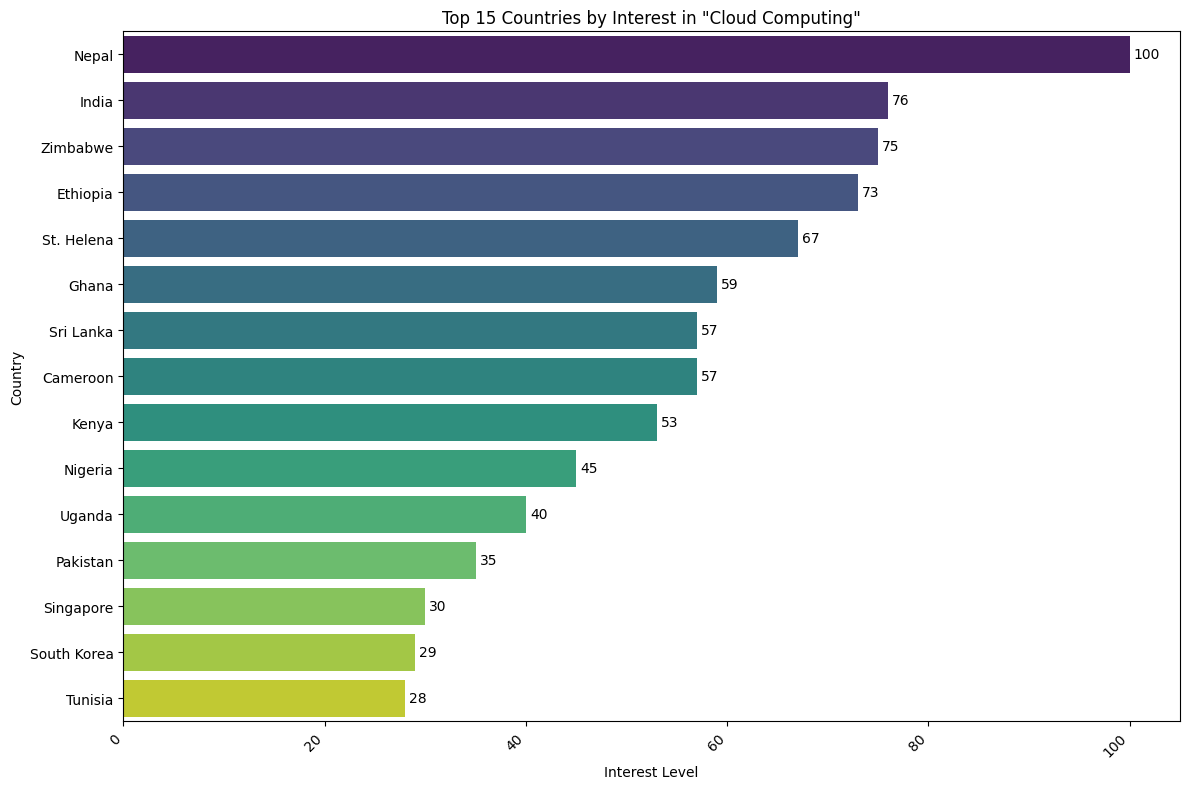

In [33]:
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=top_15_countries[keyword_list[0]], y=top_15_countries.index, palette='viridis')
plt.xticks(rotation=45)
plt.title(f'Top 15 Countries by Interest in "{keyword_list[0]}"')
plt.ylabel('Country')
plt.xlabel('Interest Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Add values on top of the bars
for p in ax.containers:
   plt.bar_label(p,fmt='%.0f',label_type='edge',color='black',padding=3)


plt.tight_layout()
plt.show()

**(3) A world map needs to be plotted showing the countries that search the keyword the most.**

In [41]:
fig = px.choropleth(region_data,
locations='geoName',
locationmode='country names',
color=keyword_list[0],
title=f"Search Interest for '{keyword_list[0]}' by Country",
color_continuous_scale='viridis')
fig.show()

**(4) We need to extract the time-wise interest of the keyword — how it trended in different years**

In [42]:
time_df=pytrends.interest_over_time()
time_df.head()

/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,Cloud Computing,isPartial
date,,
2024-05-26,86,False
2024-06-02,81,False
2024-06-09,84,False
2024-06-16,69,False
2024-06-23,80,False



 Line Plot

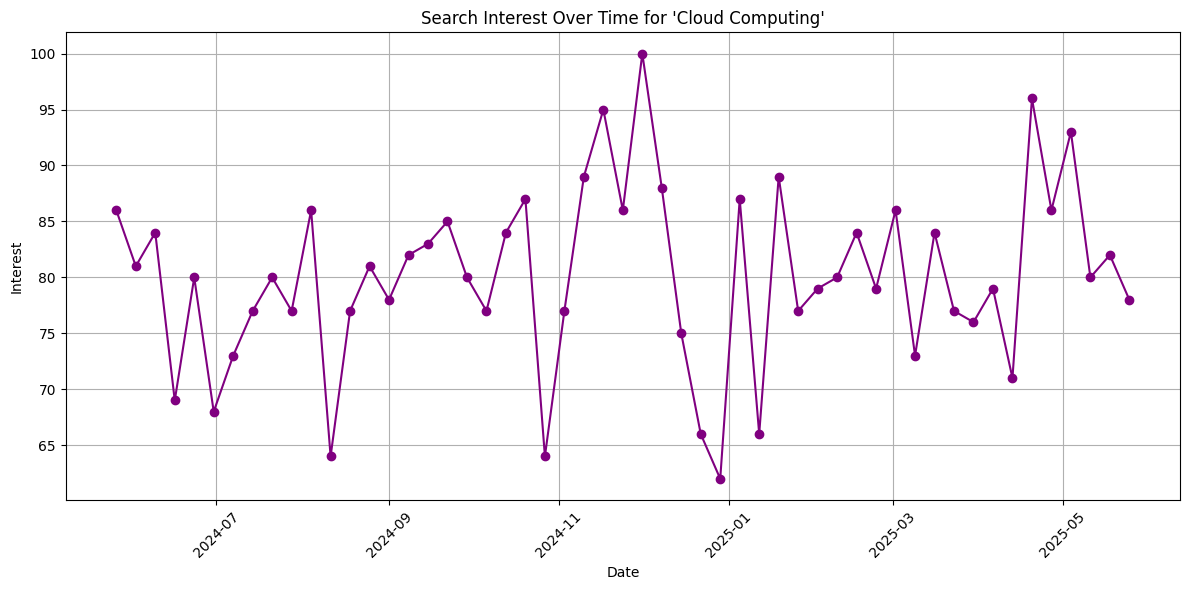

In [55]:
plt.figure(figsize=(12,6))
plt.plot(time_df.index, time_df[keyword_list[0]], marker='o', color='purple')
plt.title(f"Search Interest Over Time for '{keyword_list[0]}'")
plt.xlabel("Date")
plt.ylabel("Interest")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**(5) Compare related keywords and plot the graph.**

In [59]:
kw_list = ["cloud computing", "data science", "machine learning","deep learning"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 12-m', geo='', gprop='')

In [60]:
# Comparision Plot
compare_df = pytrends.interest_over_time()
compare_df.head()


/usr/local/lib/python3.11/dist-packages/pytrends/request.py:260: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



,cloud computing,data science,machine learning,deep learning,isPartial
date,,,,,
2024-05-26,26,77,91,30,False
2024-06-02,25,78,87,30,False
2024-06-09,26,82,99,31,False
2024-06-16,21,76,95,29,False
2024-06-23,25,77,87,29,False


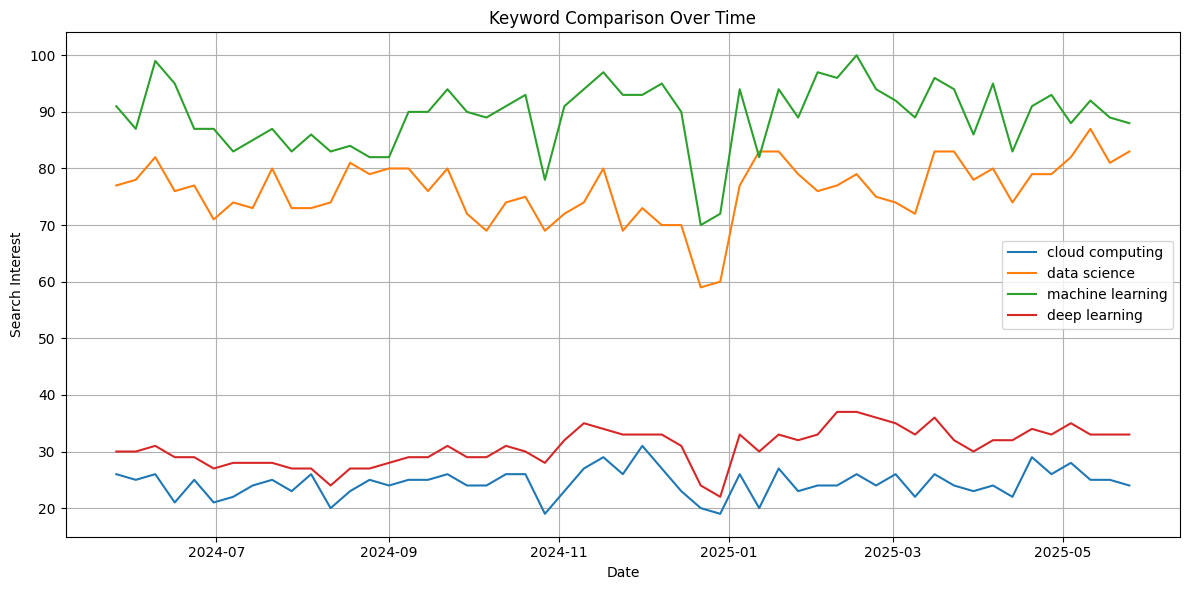

In [61]:
plt.figure(figsize=(12,6))
for kw in kw_list:
    plt.plot(compare_df.index, compare_df[kw], label=kw)
plt.title("Keyword Comparison Over Time")
plt.xlabel("Date")
plt.ylabel("Search Interest")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()